# Jupyter-Notebook zur Experimentalphysik II, SS2023

von Dr. Markus Merschmeyer, III. Physikalisches Institut A, RWTH Aachen University

## Übungsblatt 4, Aufgabe 2: Adiabatische Expansion

Hinweis: Die einzelnen Python-Codeblöcke müssen nacheinander ausgeführt werden, die geschieht jeweils durch Drücken der Tastenkombination <code>Shift+Return</code> oder mithilfe des obigen Menüs. Fall etwas schief gehen sollte, kann mit dem Knopf <code>restart the kernel</code> (kreisförmiges Pfeilsymbol) alles zurueckgesetzt werden.

### 1. Einbinden externer Python-Pakete

Hier muss zusätzlich <code>%matplotlib inline</code> angegeben werden, um die erzeugten Diagramme direkt im Jupyter-Notebook darstellen zu können:

In [3]:
import numpy as np              # numpy-Paket fuer Array-Funktionen, sqrt() usw. importieren
%matplotlib inline
import matplotlib.pyplot as plt # Paket zur Diagrammerstellung
from matplotlib import colors, cm # ... + 'ticker' (?)

### 2. Definieren benötigter Konstanten, Parameter und Anfangswerte

Aus dem <code>scipy.constants</code>-Paket wird die Boltzmann-Konstante und die atomare Masseneinheit benoetigt:

In [4]:
import scipy.constants as scc   # scipy-Paket fuer Konstanten importieren
c_kB  = scc.Boltzmann   # k_B = Boltzmann-Konstante (in J/K)
print("Boltzmann-Konstante k_B: ",c_kB,"J/K")
c_amu = scc.atomic_mass # atomare Masseneinheit (in kg)
print("atomare Masseneinheit:   ",c_amu,"kg")

Boltzmann-Konstante k_B:  1.380649e-23 J/K
atomare Masseneinheit:    1.6605390666e-27 kg


Parameter und Anfangswerte:

In [5]:
L_0 = 1.      # Anfangslänge des Kastens (in m)
L_1 = 2.      # End-Länge des Kastens (in m)
w   = 0.1     # Verschiebungsgeschwindigkeit der rechten Kastenwand (in m/s)
v_0 = 1000.   # Startgeschwindigkeit des Gasteilchens (in m/s)
fg  = 1.      # Anzahl der Freiheitsgrade des Gasteilchens
# Teilchenmasse wird für innere Energie benötigt
m   = 28*c_amu # -> z.B. Stickstoff- oder Sauerstoff-Molekül (in kg)
print("Teilchenmasse: ",m,"kg")

Teilchenmasse:  4.64950938648e-26 kg


### 3. Berechnung des Expansionsvorgangs

Es werden einige leere Listen und Variablen erzeugt, zur Speicherung der Werte aus den einzelnen Berechnungsschritten. Dann werden mit einer <code>while</code>-Schleife und der Abbruchbedingung des Erreichens der maximalen Kastenlänge die notwendigen Berechnungen durchgeführt.

In [53]:
n_col = 0    # (bisherige) Anzahl der Stoßvorgänge an der Kastenwand

l_L = [] # leere Liste für die aktuelle Länge des Kastens (im m)
l_v = [] # leere Liste für die aktuelle Geschwindigkeit der Gasteilchen (in m/s)
l_t = [] # leere Liste für die aktuelle Dauer eines Kollisionszyklus' (in s)

t_tmp = 0.   # Startzeitpunkt
L_tmp = L_0  # initialisiere anfängliche Länge des Kastens
v_tmp = v_0  # initialisiere anfängliche Geschwindigkeit des Teilchens

while L_tmp<L_1: # while-Schleife mit Abbruchbedingung
    l_t.append(t_tmp) # speichere aktuelle Zeit (an Liste anhängen)
    l_v.append(v_tmp) # speichere aktuelle Geschwindigkeit (an Liste anhängen)
    l_L.append(L_tmp) # speichere aktuelle Länge des Kastens (an Liste anhängen)
    
    n_col += 1        # erhöhe Zähler für Anzahl der Kollisionen des Gasteilchens mit der rechten Kastenwand

    L_tmp += t_tmp * w
    v_tmp -= 2*w
    t_tmp = 2 * L_tmp / v_tmp # berechne Zeitpunkt des nächsten Stoßes

print("Anzahl berechneter Kollisionen: ",n_col)
print("Schlusszeitpunkt: ",sum(l_t),"s")                # Summe aller Listenelemente
print("finale Kastenlänge: ",l_L[-1],"m")               # letztes Element der Liste
print("finale Teilchengeschwindigkeit v1: ",l_v[-1],"m/s") # letztes Element der Liste 

Anzahl berechneter Kollisionen:  2501
Schlusszeitpunkt:  10.00000000000141 s
finale Kastenlänge:  1.999200319872196 m
finale Teilchengeschwindigkeit v1:  499.9999999998898 m/s


### 4. Berechnung des Verlaufs von Temperatur und Druck

Aus den unter 3. in den entsprechenden Listen gesammelten Informationen über den Verlauf von $L$ und $v$ können jetzt die Verläufe von $T$ und $p$ berechnet werden. Bei Berechnungen mit <code>numpy</code>-Listen sind die Methoden <code>numpy.multiply(A,B)</code> und <code>numpy.divide(A,B)</code> hilfreich. Hier werden die entsprechenden Rechenoperationen mit allen Elementen der Listen $A$ und $B$ durchgeführt.

In [58]:
# numerische Ergebnisse der Simulation
l_T = np.multiply(m / (c_kB * fg) , np.multiply(l_v, l_v)) # "Temperatur" des "Gases" (in K)  [T=U*2/(N*kB*fg)]
l_p = np.multiply(c_kB, np.divide(l_T, l_L)) # "Druck x Quersschnittsfläche des Kastens" (in N) [p=N*kB*T/V]
print("Verhältnis T1/T0: ",l_T[-1]/l_T[0],)
print("Verhältnis p1/p0: ",l_p[-1]/l_p[0],)

# (ggf.) analytische 

Verhältnis T1/T0:  0.24999999999988978
Verhältnis p1/p0:  0.12504999999993582


### 5. Grafische Darstellung der Ergebnisse

Nun werden die $T1/T0$-$V1/V0$- und $p1/p0$-$V1/V0$-Diagramme vorbereitet und dargestellt.

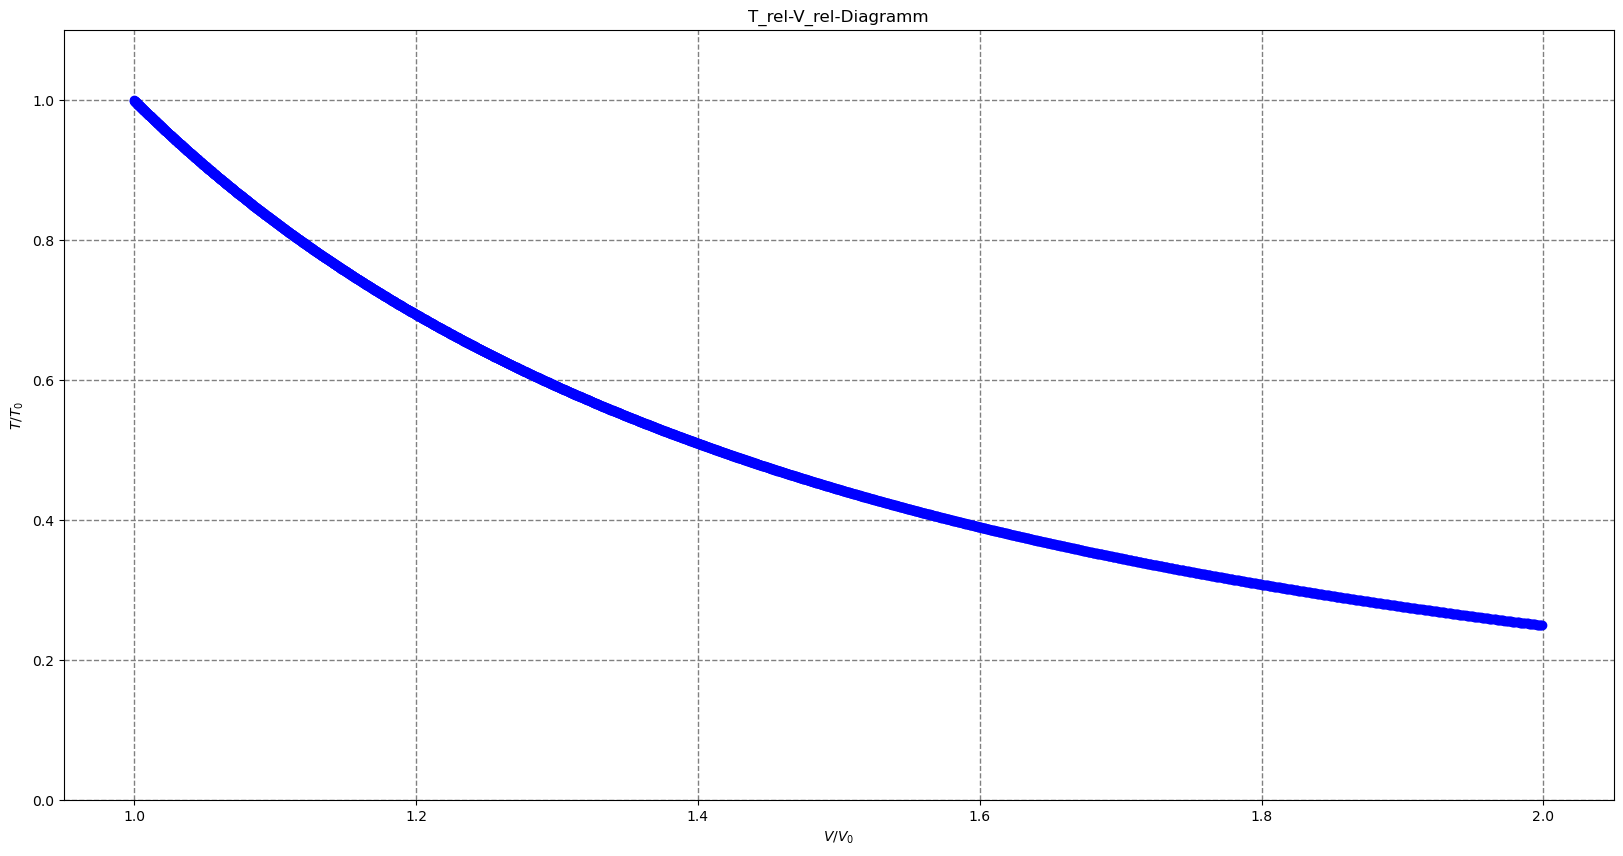

In [59]:
# T1/T0-V1/V0-Diagramm
fig, ax = plt.subplots(1, sharex=False)
fig.set_size_inches(20., 10.) # Groesse der exportierten Bilddatei in Zoll (Breite, Hoehe)

# Berechnung der Listen für die x- und y-Werte
xtmp  = np.multiply(l_L, 1/l_L[0])
ytmp  = np.multiply(l_T, 1/l_T[0])

l1 = ax.plot(xtmp, ytmp, 'bo')
ax.grid(color='gray', linestyle='--', linewidth=1)
ax.set_title('T_rel-V_rel-Diagramm')   # ... Diagrammtitel
ax.set_xlabel('$V / V_0$')     # ... Beschriftung x-Achse
ax.set_ylabel('$T / T_0$')     # ... Beschriftung y-Achse
ax.axis([0.95, 2.05, 0., 1.1]) # ... Wertebereich x-Achse, y-Achse

#fig.savefig('AdEx_Trel_vs_Vrel.png', dpi=300)
plt.show()

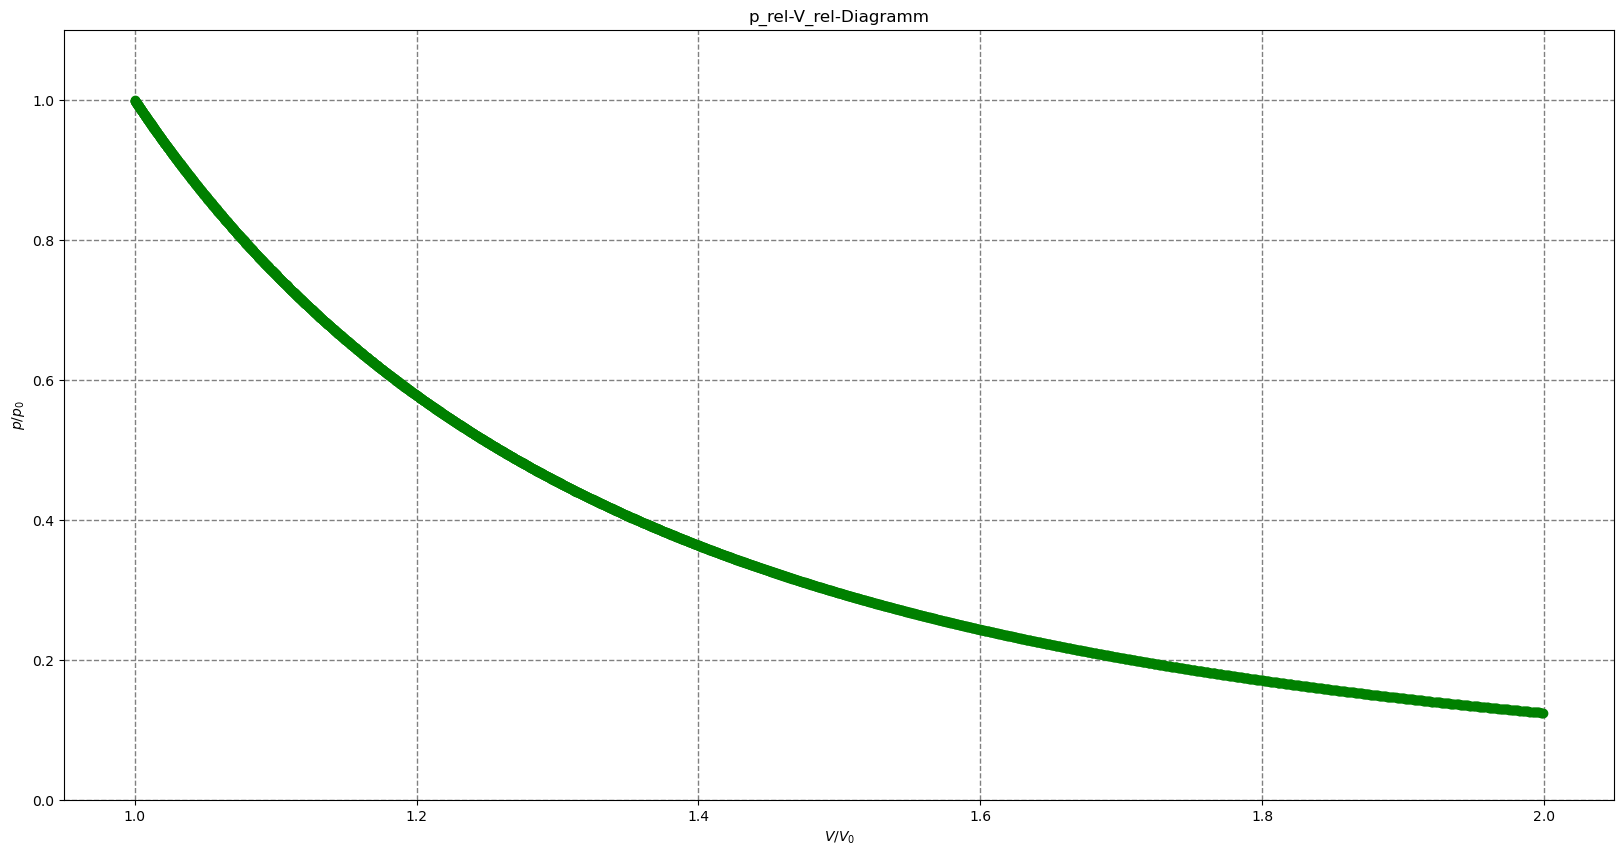

In [60]:
# p1/p0-V1/V0-Diagramm
fig, ax = plt.subplots(1, sharex=False)
fig.set_size_inches(20., 10.) # Groesse der exportierten Bilddatei in Zoll (Breite, Hoehe)
    
# Berechnung der Listen für die x- und y-Werte
#xtmp  = l_v
ytmp  = np.multiply(l_p, 1/l_p[0])

l1 = ax.plot(xtmp, ytmp, 'go')
ax.grid(color='gray', linestyle='--', linewidth=1)
ax.set_title('p_rel-V_rel-Diagramm') # ... Diagrammtitel
ax.set_xlabel('$V / V_0$')     # ... Beschriftung x-Achse
ax.set_ylabel('$p / p_0$')     # ... Beschriftung y-Achse
ax.axis([0.95, 2.05, 0., 1.1]) # ... Wertebereich x-Achse (z-Werte), y-Achse (Bz-Feldstaerke)

#fig.savefig('AdEx_prel_vs_Vrel.png', dpi=300)
plt.show()